<a href="https://colab.research.google.com/github/praharikareddy/ML_23AG1A66E7/blob/main/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Processing

In [9]:
import pandas as pd
data=pd.read_csv('Name-Age-Gender-Marks-City.csv')
data.head()

Name   Age Gender  Marks      City
0  Alice  18.0      F   85.0    London
1    Bob   NaN      M   90.0  New York
2  Cathy  19.0      F   95.0       NaN
3  David  17.0      M   72.0    Sydney
4    Eva  18.0      F    NaN    London

Handling Missing Values

In [3]:
data.fillna({
    'Age':data['Age'].mean(),
    'Marks':data['Marks'].mean(),
    'City':'Unknown'
},inplace=True)
print(data)

    Name   Age Gender  Marks      City
0  Alice  18.0      F   85.0    London
1    Bob  18.0      M   90.0  New York
2  Cathy  19.0      F   95.0   Unknown
3  David  17.0      M   72.0    Sydney
4    Eva  18.0      F   85.5    London


Removing Duplicates

In [4]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Alice'],
    'Age': [18, 18, 18],
    'Gender': ['F', 'M', 'F'],
    'Marks': [85, 90, 85]
}
df = pd.DataFrame(data)
print("Original Data:")
print(df)
df_no_duplicates = df.drop_duplicates()
print("\nAfter Removing Duplicates:")
print(df_no_duplicates)

Original Data:
    Name  Age Gender  Marks
0  Alice   18      F     85
1    Bob   18      M     90
2  Alice   18      F     85

After Removing Duplicates:
    Name  Age Gender  Marks
0  Alice   18      F     85
1    Bob   18      M     90


Correcting Data Types

In [5]:
import pandas as pd
df = pd.DataFrame({
    'Name': ['John', 'Alice'],
    'Age': ['25', '30'],
    'Salary': ['50000', '55000']
})
print(df.dtypes)

Name      object
Age       object
Salary    object
dtype: object


In [6]:
df['Age'] = df['Age'].astype(int)
df['Salary'] = df['Salary'].astype(float)
print(df.dtypes)

Name       object
Age         int64
Salary    float64
dtype: object


In [7]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [10]:
data['Gender']=data['Gender'].map({'F':0,'M':1})
print(data)

    Name   Age  Gender  Marks      City
0  Alice  18.0       0   85.0    London
1    Bob   NaN       1   90.0  New York
2  Cathy  19.0       0   95.0       NaN
3  David  17.0       1   72.0    Sydney
4    Eva  18.0       0    NaN    London


In [11]:
data = pd.get_dummies(data, columns=['City'])
print(data)

    Name   Age  Gender  Marks  City_London  City_New York  City_Sydney
0  Alice  18.0       0   85.0         True          False        False
1    Bob   NaN       1   90.0        False           True        False
2  Cathy  19.0       0   95.0        False          False        False
3  David  17.0       1   72.0        False          False         True
4    Eva  18.0       0    NaN         True          False        False


In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Marks'] = scaler.fit_transform(data[['Marks']])
print(data)

    Name   Age  Gender     Marks  City_London  City_New York  City_Sydney
0  Alice  18.0       0  0.565217         True          False        False
1    Bob   NaN       1  0.782609        False           True        False
2  Cathy  19.0       0  1.000000        False          False        False
3  David  17.0       1  0.000000        False          False         True
4    Eva  18.0       0       NaN         True          False        False


In [13]:
import pandas as pd
data = {
    'Name': ['Alice', 'Bob', 'Cathy','David'],
    'Age': [18, 20, 22,19],
    'Gender': ['F', 'M', 'F','M'],
    'Marks': [85, 90, 78,88]
}
df=pd.DataFrame(data)
print(df)

    Name  Age Gender  Marks
0  Alice   18      F     85
1    Bob   20      M     90
2  Cathy   22      F     78
3  David   19      M     88


In [14]:
def grade(marks):
    if marks >= 85:
        return 'A'
    elif marks >= 70:
        return 'B'
    else:
        return 'C'

df['Grade'] = df['Marks'].apply(grade)

In [15]:
bins = [0, 18, 21, 100]
labels = ['Teen', 'Young Adult', 'Adult']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
print(df)

    Name  Age Gender  Marks Grade    Age Group
0  Alice   18      F     85     A         Teen
1    Bob   20      M     90     A  Young Adult
2  Cathy   22      F     78     B        Adult
3  David   19      M     88     A  Young Adult


In [16]:
data=pd.read_csv('Name-Age-Gender-Marks-City.csv')
data = data[(data['Marks'] >= 60) & (data['Marks'] <= 100)]
print(data)

    Name   Age Gender  Marks      City
0  Alice  18.0      F   85.0    London
1    Bob   NaN      M   90.0  New York
2  Cathy  19.0      F   95.0       NaN
3  David  17.0      M   72.0    Sydney


In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)
print("Train Data:\n", train)
print("Test Data:\n", test)

Train Data:
     Name   Age Gender  Marks      City
1    Bob   NaN      M   90.0  New York
3  David  17.0      M   72.0    Sydney
2  Cathy  19.0      F   95.0       NaN
Test Data:
     Name   Age Gender  Marks    City
0  Alice  18.0      F   85.0  London


In [18]:
import pandas as pd

# Example data
data = {
    'Age': [18, 21, 19, 25, 30, 22, 23, 20],
    'Hours_Study': [2, 5, 3, 8, 10, 6, 7, 4],
    'Marks': [55, 80, 60, 88, 95, 70, 78, 65]
}
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                  Age  Hours_Study     Marks
Age          1.000000     0.970806  0.923392
Hours_Study  0.970806     1.000000  0.949103
Marks        0.923392     0.949103  1.000000


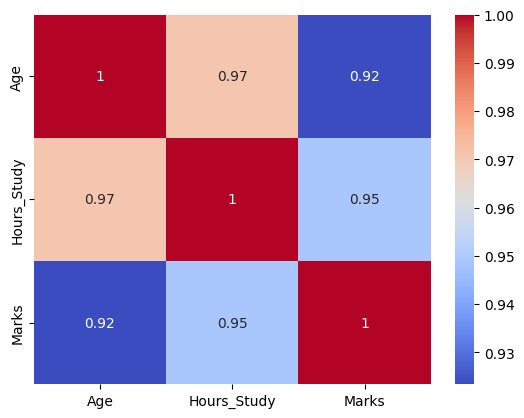

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()